In [172]:
from kneed import KneeLocator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [173]:
# loading the data from csv file to a Pandas DataFrame
bullying_data = pd.read_csv('/kaggle/input/bullying-in-school/Bullying_2018.csv')

In [174]:
# first 5 rows in the dataframe
bullying_data.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


In [175]:
# finding the number of rows and columns
bullying_data.shape

(56981, 18)

In [176]:
# getting some informations about the dataset
bullying_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

In [177]:
bullying_data.columns

Index(['record', 'Bullied_on_school_property_in_past_12_months',
       'Bullied_not_on_school_property_in_past_12_months',
       'Cyber_bullied_in_past_12_months', 'Custom_Age', 'Sex',
       'Physically_attacked', 'Physical_fighting', 'Felt_lonely',
       'Close_friends', 'Miss_school_no_permission',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Most_of_the_time_or_always_felt_lonely',
       'Missed_classes_or_school_without_permission', 'Were_underweight',
       'Were_overweight', 'Were_obese'],
      dtype='object')

In [203]:
# Select the columns of interest
columns_of_interest = ['Cyber_bullied_in_past_12_months', 'Custom_Age', 'Sex', 'Physically_attacked']
data_selected = bullying_data[columns_of_interest]

In [204]:
# Check if data_selected contains missing or None values
if pd.isnull(data_selected).sum().sum() > 0:
    # Handle missing values using mean imputation
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(data_selected)
else:
    X = data_selected.values


In [205]:
# Apply label encoding to convert strings to numerical labels
label_encoder = LabelEncoder()
for i in range(X.shape[1]):
    if isinstance(X[0, i], str):
        X[:, i] = label_encoder.fit_transform(X[:, i])


In [206]:

# Apply one-hot encoding to categorical columns
categorical_features = [2] # 'Sex' column
onehot_encoder = OneHotEncoder(sparse=False)
for feature in categorical_features:
    feature_encoded = onehot_encoder.fit_transform(X[:, feature].reshape(-1, 1))
    feature_names = [f"{feature}_{value}" for value in onehot_encoder.categories_[0]]
    X = np.concatenate((X[:, :feature], feature_encoded, X[:, feature+1:]), axis=1)
    columns_of_interest = columns_of_interest[:feature] + feature_names + columns_of_interest[feature+1:]


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [210]:
# Apply feature scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [212]:
# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

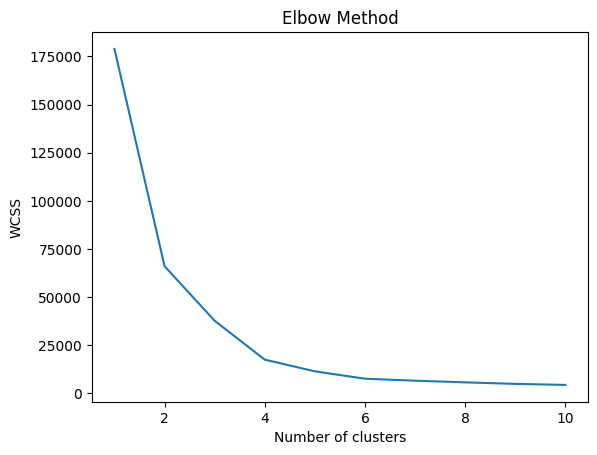

In [213]:
# Determine the optimal number of clusters using the elbow method
wcss = []
range_values = range(1, 11)
for i in range_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range_values, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
    

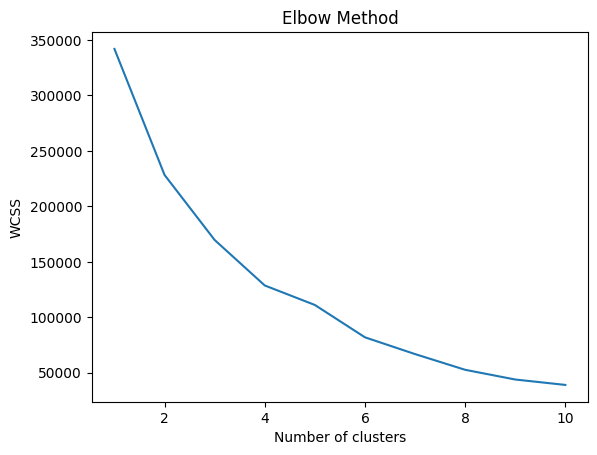

In [211]:

# Determine the optimal number of clusters using the elbow method
wcss = []
range_values = range(1, 11)
for i in range_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range_values, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
    


In [185]:
# Use KneeLocator to find the elbow point

kn = KneeLocator(range_values, wcss, curve='convex', direction='decreasing')
optimal_k = kn.knee

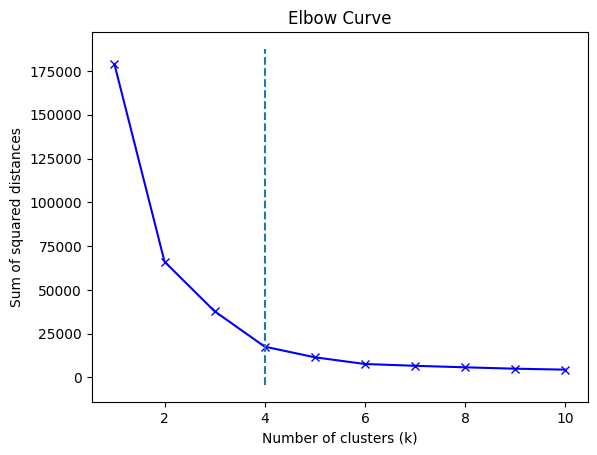

The optimal number of clusters is 4


In [186]:
# Plot the elbow curve and the elbow point
plt.plot(range_values, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Curve')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

print(f"The optimal number of clusters is {optimal_k}")

In [187]:
# Fit a KMeans model with the optimal number of clusters to the scaled data
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_pca)
labels = kmeans.labels_



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
# Fit a KMeans model with the optimal number of clusters to the scaled data
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_scaled)
labels = kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
# Get cluster centers and print them
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=columns_of_interest)
cluster_centers

,Cyber_bullied_in_past_12_months,Custom_Age,2_0,2_1,2_2,Physically_attacked
0,-0.139592,0.011070,-0.097447,-1.031072,1.050685,0.039895
1,-0.503061,-0.037792,-0.097447,0.969865,-0.951760,-0.135612
2,1.863498,0.088497,-0.097447,0.969865,-0.951760,0.212877
3,-0.150087,-0.344086,10.261961,-1.031072,-0.951760,0.294203


In [188]:
# Get cluster centers and print them
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=['PCA Component 1', 'PCA Component 2'])
cluster_centers

,PCA Component 1,PCA Component 2
0,1.235955,1.801042
1,-1.257264,-0.684663
2,1.508596,-0.390710
3,-1.599150,1.326140


/tmp/ipykernel_34/1826134744.py:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x="PCA Component 1", y="PCA Component 2", hue="cluster", data=X_pca_df, palette=['red','green','blue','pink','yellow','gray','purple','black'])


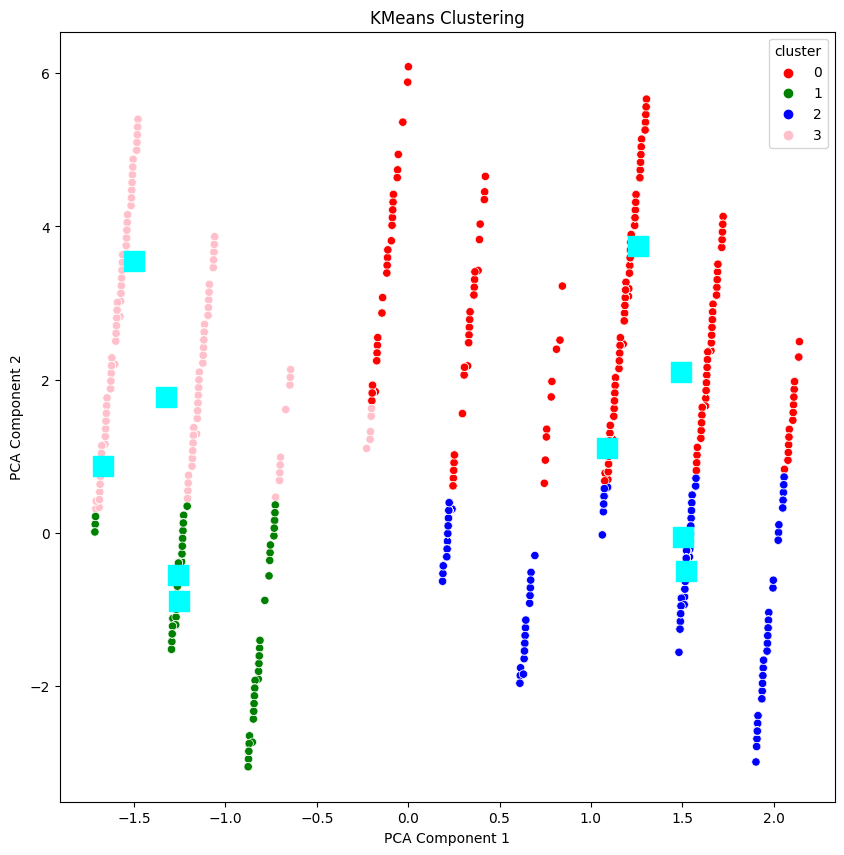

In [196]:
# Add the cluster labels to the PCA dataframe
X_pca_df = pd.DataFrame(data=X_pca, columns=['PCA Component 1', 'PCA Component 2'])
X_pca_df['cluster'] = labels

# Plot the clusters and centroids using a scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(x="PCA Component 1", y="PCA Component 2", hue="cluster", data=X_pca_df, palette=['red','green','blue','pink','yellow','gray','purple','black'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='cyan', marker='s')
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [46]:
# Compute the within-cluster sum of squared errors (WCSS)
wcss = kmeans.inertia_
print('Within-Cluster Sum of Squared Errors (WCSS):', wcss)

Within-Cluster Sum of Squared Errors (WCSS): 136624.38449200158


In [190]:
# Compute the within-cluster sum of squared errors (WCSS)
wcss = kmeans.inertia_
print('Within-Cluster Sum of Squared Errors (WCSS):', wcss)

Within-Cluster Sum of Squared Errors (WCSS): 17542.974781223955


In [191]:

# Compute the silhouette score
silhouette_avg = silhouette_score(X_pca, labels)
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.7804221632411731


In [47]:
# Compute the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.4710240896515281


In [139]:
kmeans.cluster_centers_.shape

(10, 2)

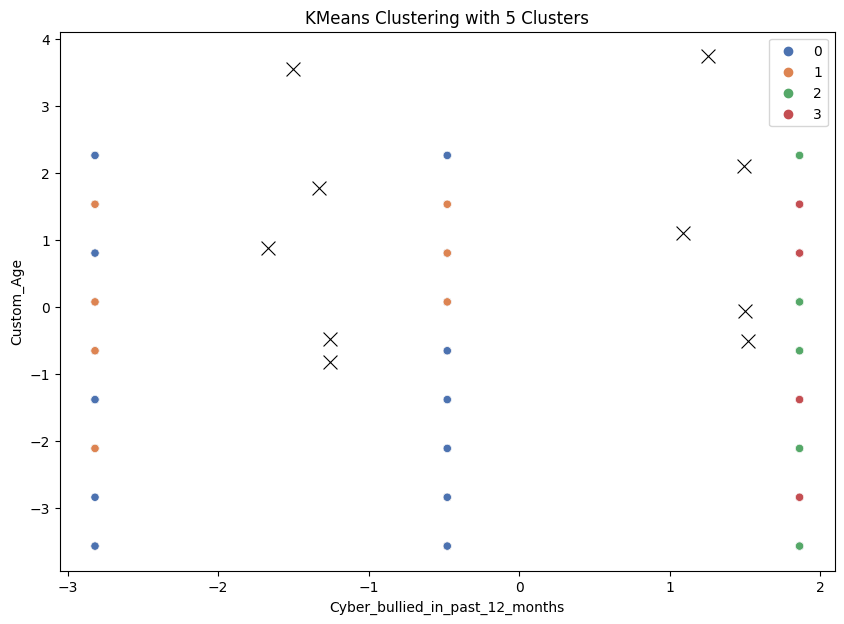

In [140]:
# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='deep')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='black', marker='x', s=100)
plt.xlabel('Cyber_bullied_in_past_12_months')
plt.ylabel('Custom_Age')
plt.title('KMeans Clustering with 5 Clusters')
plt.show()

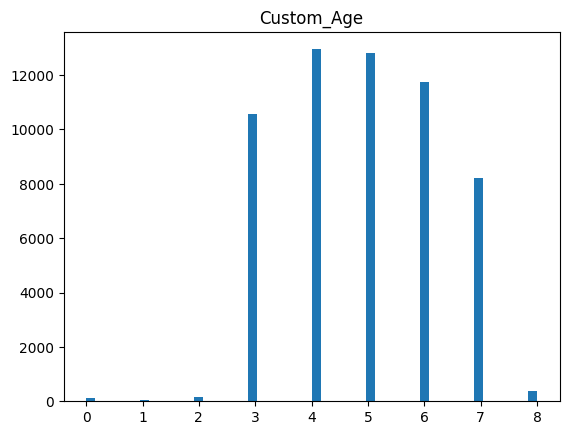

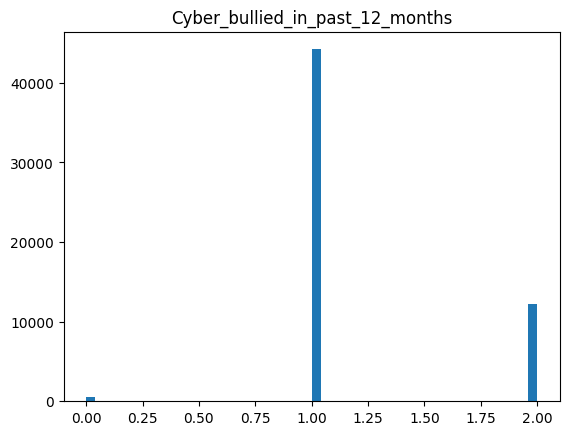

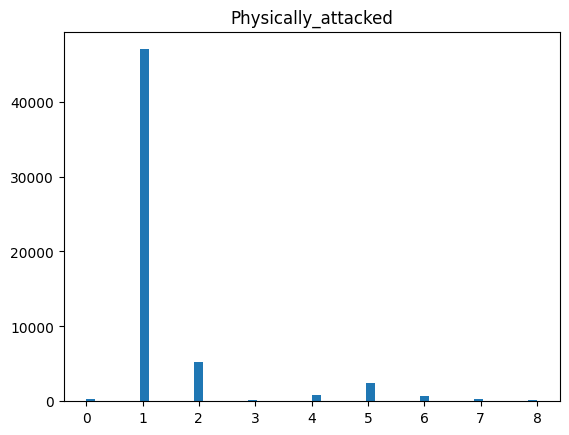

In [141]:
# Create histograms for each numerical feature
numerical_features = ['Custom_Age', 'Cyber_bullied_in_past_12_months', 'Physically_attacked']
for feature in numerical_features:
    plt.hist(data_selected[feature], bins=50)
  
    plt.title(feature)
    plt.show()

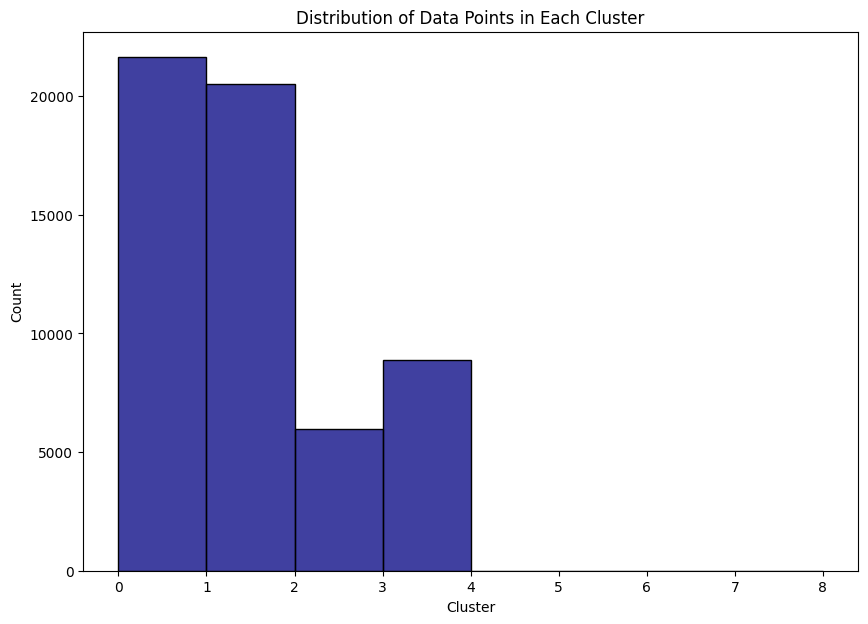

In [142]:
# Plot the distribution of data points in each cluster
plt.figure(figsize=(10, 7))
sns.histplot(x=labels, bins=range(9), color='navy', edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Data Points in Each Cluster')
plt.show()

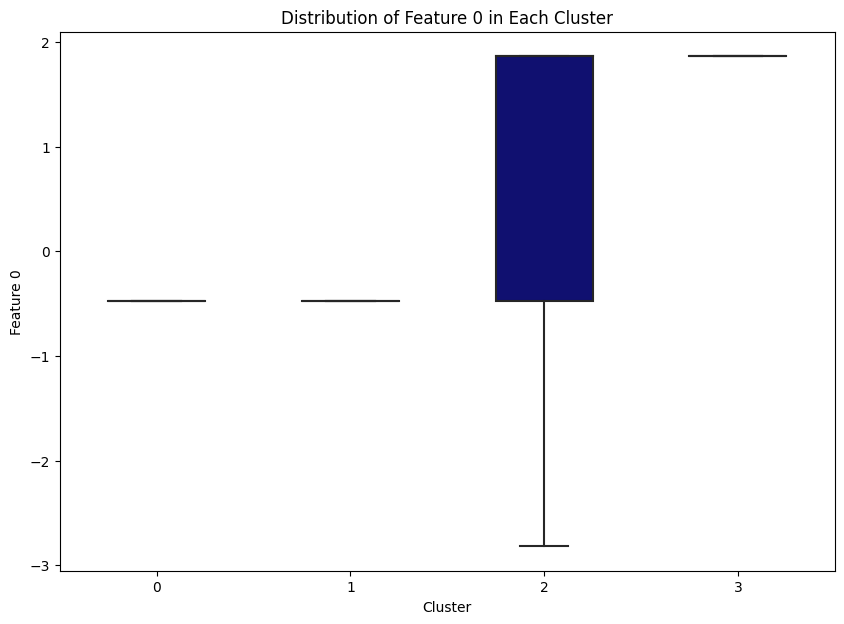

<AxesSubplot: xlabel='Cluster', ylabel='Feature 1'>

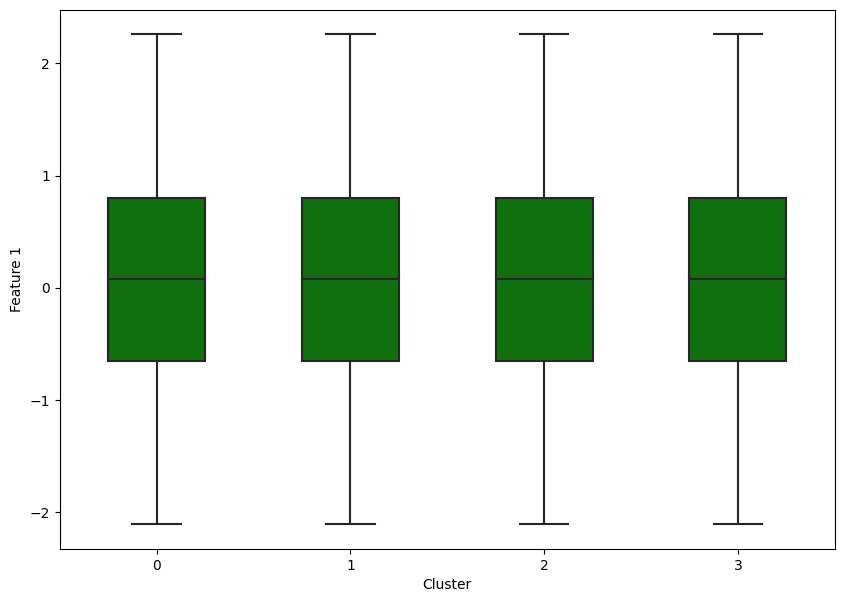

In [143]:
# Plot the feature distributions for each cluster
plt.figure(figsize=(10, 7))
sns.boxplot(data=pd.DataFrame(X_scaled, columns=[f'Feature {i}' for i in range(len(X_scaled[0]))]).assign(Cluster=labels),
            x='Cluster', y='Feature 0', color='navy', showfliers=False, width=0.5)
plt.xlabel('Cluster')
plt.ylabel('Feature 0')
plt.title('Distribution of Feature 0 in Each Cluster')
plt.show()

plt.figure(figsize=(10, 7))
sns.boxplot(data=pd.DataFrame(X_scaled, columns=[f'Feature {i}' for i in range(len(X_scaled[0]))]).assign(Cluster=labels),
            x='Cluster', y='Feature 1', color='green', showfliers=False, width=0.5)

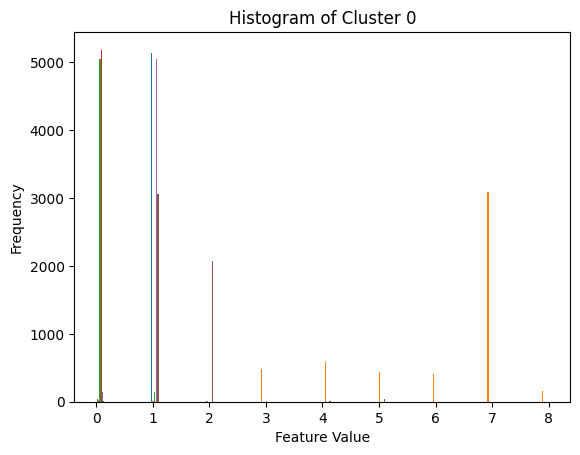

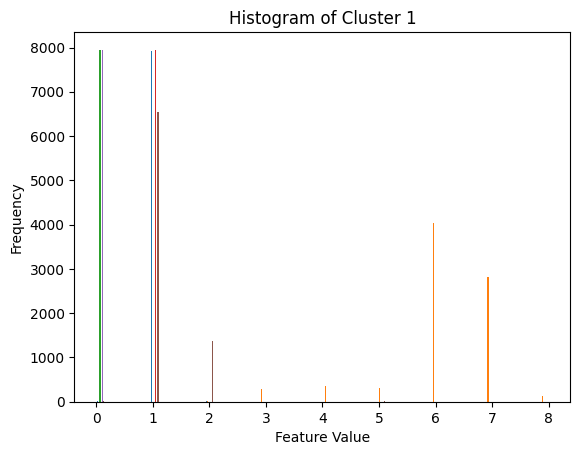

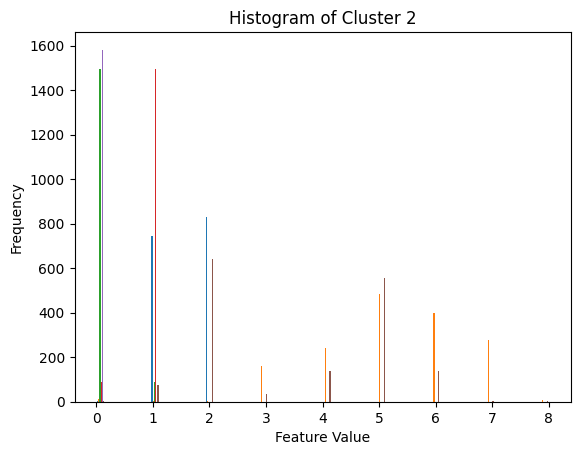

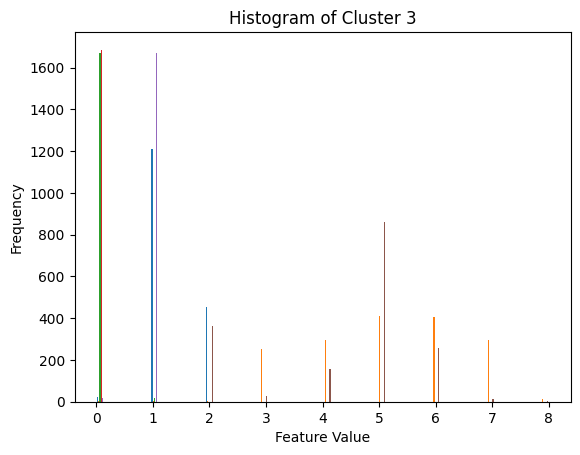

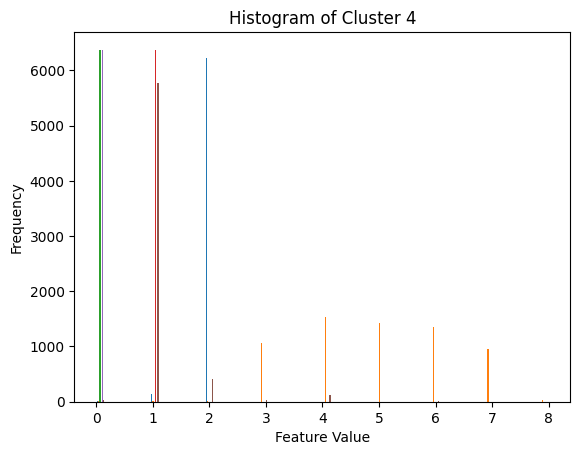

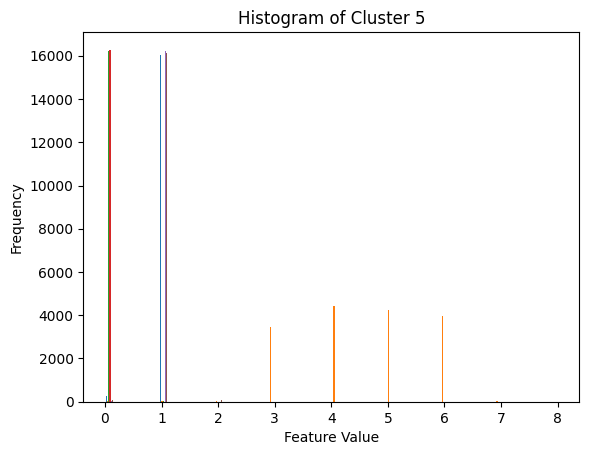

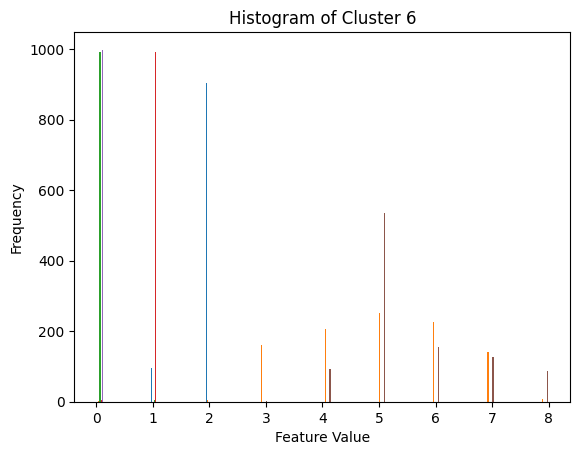

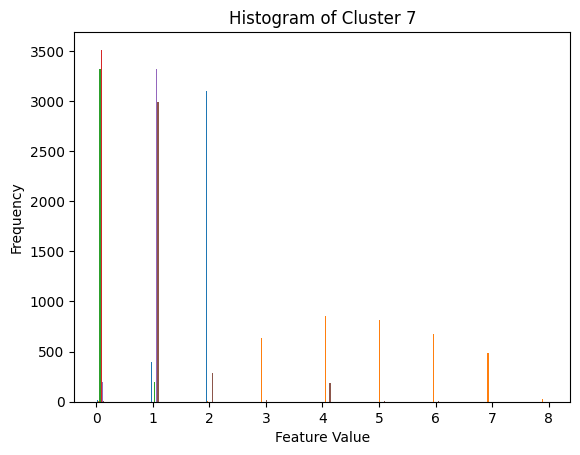

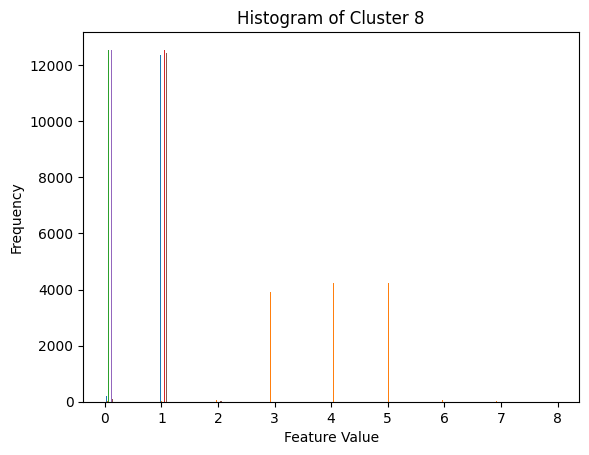

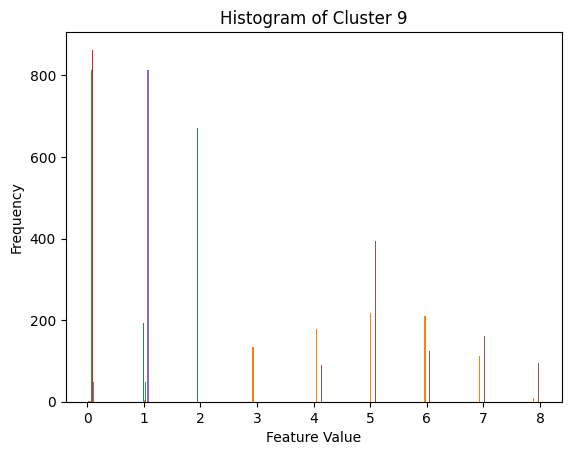

In [144]:

# Create a histogram for each cluster
for i in range(kmeans.n_clusters):
    cluster_data = X[kmeans.labels_ == i]
    plt.hist(cluster_data, bins=50)
    plt.title(f"Histogram of Cluster {i}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.show()

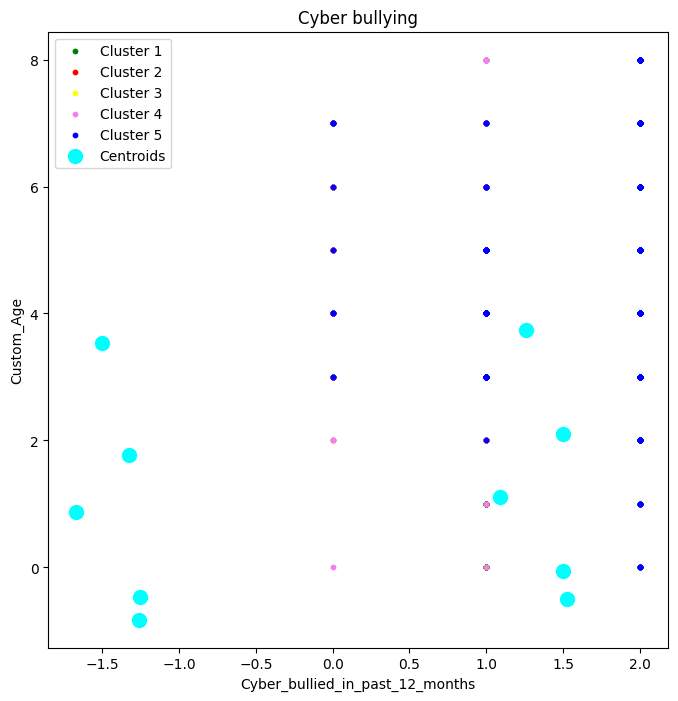

In [145]:

# Plot the clusters and centroids
plt.figure(figsize=(8,8))
plt.scatter(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], s=10, c='green', label='Cluster 1')
plt.scatter(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], s=10, c='red', label='Cluster 2')
plt.scatter(X[kmeans.labels_==2,0], X[kmeans.labels_==2,1], s=10, c='yellow', label='Cluster 3')
plt.scatter(X[kmeans.labels_==3,0], X[kmeans.labels_==3,1], s=10, c='violet', label='Cluster 4')
plt.scatter(X[kmeans.labels_==4,0], X[kmeans.labels_==4,1], s=10, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Cyber bullying')
plt.xlabel('Cyber_bullied_in_past_12_months')
plt.ylabel('Custom_Age')
plt.legend()
plt.show()